In [16]:
import numpy as np
import pandas as pd
import requests
import time
import os

from selenium import webdriver
from selenium.webdriver.support.ui import Select

import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data Scrapping from internet

In [2]:
url = 'https://www.premierleague.com/tables?co=1&se=363&ha=-1'

In [3]:
driver = webdriver.Chrome()
driver.maximize_window()
driver.get(url)

In [4]:
# try-except block for removing the cookie pop up on the screen blocking content and wait for page to load...
try:
    driver.find_element_by_xpath('/html/body/section/div/div').click()
except:
    pass
time.sleep(1)

# get the drop down element and click on it to get the drop down list
drpdn_el = driver.find_element_by_xpath(f'//*[@class="tabbedContent"]//*[@data-dropdown-block="gameweekNumbers"]')
drpdn_el.click()

# stores all the elements in the drop down list
els = driver.find_elements_by_xpath(f'//*[@class="tabbedContent"]//*[@data-dropdown-block="gameweekNumbers"]//*[@data-option-name]')

# Go to first gameweek
gw = 1
driver.find_element_by_xpath(f'//*[@class="tabbedContent"]//*[@data-dropdown-block="gameweekNumbers"]//*[@data-option-name={gw}]').click()
time.sleep(1)

# Fetching positions from the gameweek:
table = driver.find_elements_by_tag_name('table')[0]
list_ = table.find_elements_by_tag_name('tr')
teams = [list_[i] for i in range(len(list_)) if i%2!=0]

temp = pd.DataFrame([team.text.split('\n')[:2][-1::-1] for team in teams], columns=['Teams', f'GW-{gw}'])

In [6]:
# Now we want to iteratively click on each element of the drop down list while also scrapping data about positions of each team
for gw in range(2,len(els)):
    
    # get the drop down element and click on it to get the drop down list
    drpdn_el = driver.find_element_by_xpath(f'//*[@class="tabbedContent"]//*[@data-dropdown-block="gameweekNumbers"]')
    drpdn_el.click() 
    driver.find_element_by_xpath(f'//*[@class="tabbedContent"]//*[@data-dropdown-block="gameweekNumbers"]//*[@data-option-name={gw}]').click()
    time.sleep(1)
    
    # Fetching positions from one gameweek:
    table = driver.find_elements_by_tag_name('table')[0]
    list_ = table.find_elements_by_tag_name('tr')
    teams = [list_[i] for i in range(len(list_)) if i%2!=0]
    assert len(teams) == 20, 'Probably something is wrong...'
    
    temp1 = pd.DataFrame([team.text.split('\n')[:2][-1::-1] for team in teams], columns=['Teams', f'GW-{gw}'])
    temp = pd.merge(temp, temp1, on='Teams', how='outer')
    time.sleep(0.25)

In [19]:
driver.quit())
temp.to_csv('PL_stat.csv')

#### ISSUES

1. Unable to click elements which are not visible.
2. Some thing needs to be changed in order to properly feed data into dict/list/dataframe etc.

Resolved problem 2 by relying on dataframes. We merge dataframes iteratively rather than use dictionaries.
Resolving problem 2 solved problem 1 too. Treating game week 1 page seperately and then running the loop thereafter did the trick. It is much cleaner too.

Should put it into a class and make methods now 

## Plotting scraped data beautifully

In [3]:
path = os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'BLR_DEL_Tickets_MMT.csv',
 'chromedriver.exe',
 'min_flight_price_trend.csv',
 'parse.py',
 'PL_stat.csv',
 'PL_Trend_top5.ipynb',
 'Prices_trend.html',
 'README.txt',
 'Scrapify.ipynb',
 'scrappy_MMT.py',
 'telegram_bot_API.ipynb',
 'util.py',
 '__pycache__']

In [14]:
pl_stats = pd.read_csv(path+'/PL_stat.csv')
del pl_stats['Unnamed: 0']
pl_stats

,Teams,GW-1,GW-2,GW-3,GW-4,GW-5,GW-6,GW-7,GW-8,GW-9,...,GW-29,GW-30,GW-31,GW-32,GW-33,GW-34,GW-35,GW-36,GW-37,GW-38
0,Arsenal,1.0,3,5,4,5,11,9,11,12,...,9,10,9,9,10,9,9,9,9,8
1,Leicester City,2.0,1,1,3,4,4,2,1,4,...,3,3,3,3,3,3,3,3,5,5
2,Chelsea,3.0,11,9,7,8,10,7,5,3,...,4,5,5,4,4,4,4,4,3,4
3,Newcastle United,4.0,13,10,9,13,14,11,13,15,...,17,17,17,15,16,17,16,16,15,12
4,Wolverhampton Wanderers,5.0,12,16,13,6,9,6,9,9,...,13,14,12,12,12,12,12,12,12,13
5,Liverpool,6.0,4,2,5,3,2,1,3,2,...,7,7,6,7,6,7,5,5,4,3
6,Crystal Palace,7.0,5,6,12,14,8,13,8,11,...,12,12,13,13,13,13,13,13,13,14
7,Everton,8.0,2,3,1,1,1,4,7,6,...,8,8,8,8,8,8,8,8,8,10
8,Leeds United,9.0,10,7,8,10,6,12,15,14,...,11,11,10,10,9,11,10,10,10,9
9,Southampton,10.0,19,15,11,12,7,5,4,5,...,14,13,14,14,15,15,14,14,14,15


In [23]:
utd = pl_stats[pl_stats['Teams'] == 'Manchester United']
utd = utd.dropna(how='any',axis=1)
utd

,Teams,GW-2,GW-3,GW-4,GW-5,GW-6,GW-7,GW-8,GW-9,GW-10,...,GW-29,GW-30,GW-31,GW-32,GW-33,GW-34,GW-35,GW-36,GW-37,GW-38
19,Manchester United,15,14,16,15,15,15,14,10,9,...,2,2,2,2,2,2,2,2,2,2


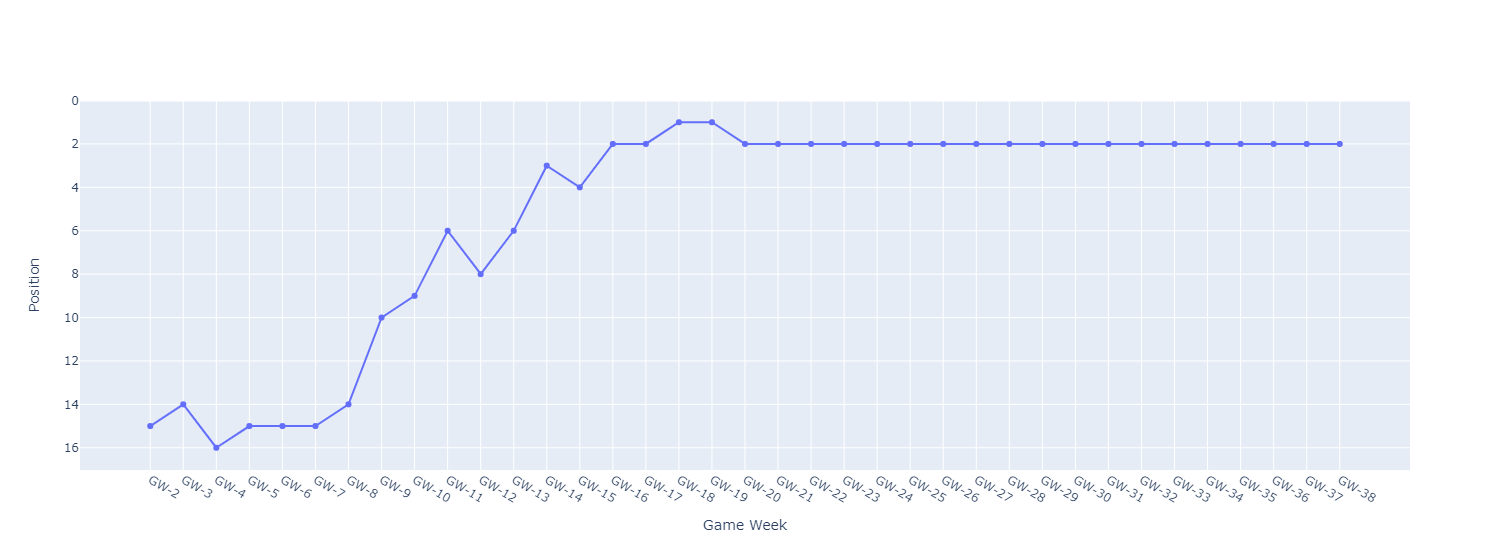

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=(utd.columns[1:]), y=utd.iloc[0,1:], mode = 'lines+markers',
                         name = ' Manchester United Stats'))
fig.update_yaxes(autorange='reversed', title='Position')
fig.update_xaxes(title='Game Week')
fig.update_layout(width = 1500, height = 550)

In [129]:
# teams to watch
clubs = {'Manchester United': ['#e60000', 1, 3], 'Manchester City': ['#33d6ff', 1, 3], 
         'Liverpool': ['#cc0000', 1, 3], 'Chelsea': ['#005ce6', 1, 3], 
         'Arsenal': ['#ff4d4d', 0.33, None], 'Leicester City': ['#668cff', 0.33, None], 'Everton': ['#4d4dff', 0.33, None], 'Tottenham Hotspur': ['#b1cdcd', 0.33, None]}

In [113]:
topclubs = pl_stats.loc[pl_stats['Teams'].isin(clubs.keys())]

In [114]:
topclubs

,Teams,GW-1,GW-2,GW-3,GW-4,GW-5,GW-6,GW-7,GW-8,GW-9,...,GW-29,GW-30,GW-31,GW-32,GW-33,GW-34,GW-35,GW-36,GW-37,GW-38
0,Arsenal,1.0,3,5,4,5,11,9,11,12,...,9,10,9,9,10,9,9,9,9,8
1,Leicester City,2.0,1,1,3,4,4,2,1,4,...,3,3,3,3,3,3,3,3,5,5
2,Chelsea,3.0,11,9,7,8,10,7,5,3,...,4,5,5,4,4,4,4,4,3,4
5,Liverpool,6.0,4,2,5,3,2,1,3,2,...,7,7,6,7,6,7,5,5,4,3
7,Everton,8.0,2,3,1,1,1,4,7,6,...,8,8,8,8,8,8,8,8,8,10
10,Tottenham Hotspur,11.0,6,8,6,7,5,3,2,1,...,6,6,7,6,7,6,7,6,7,7
16,Manchester City,NaN,7,13,14,11,13,10,10,13,...,1,1,1,1,1,1,1,1,1,1
19,Manchester United,NaN,15,14,16,15,15,15,14,10,...,2,2,2,2,2,2,2,2,2,2


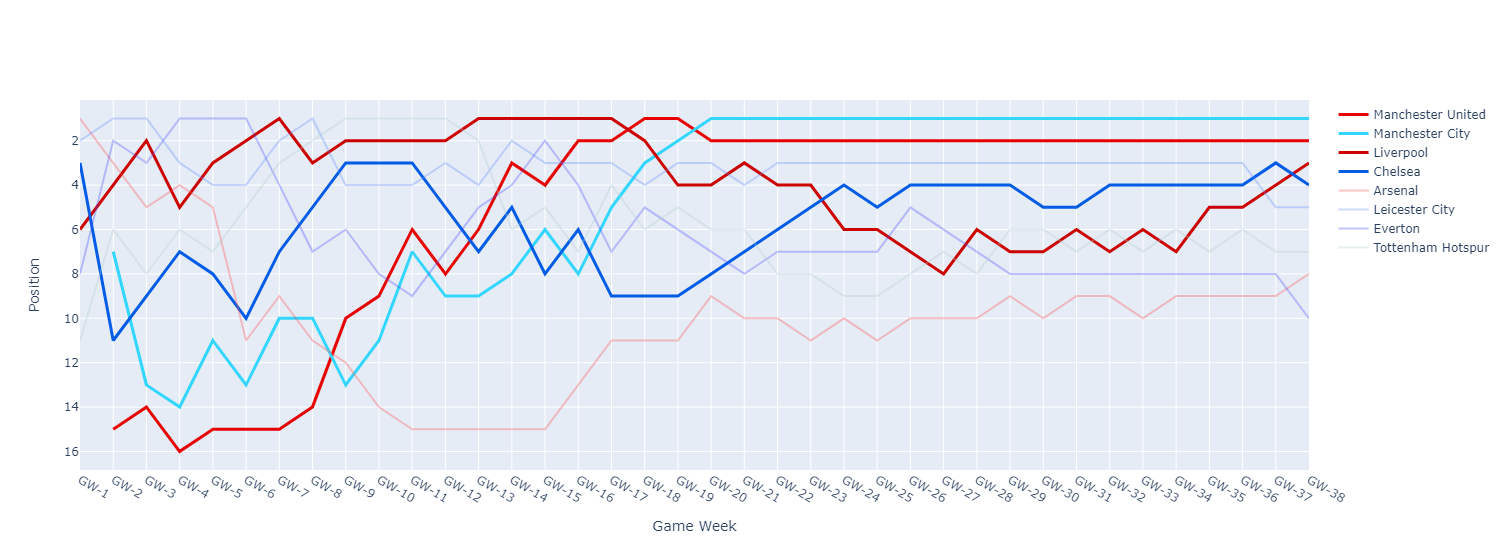

In [135]:
fig = go.Figure()
for club, attr in clubs.items():
    y = topclubs[topclubs['Teams'] == club].iloc[0,1:]
    color, op, lw = attr
    fig.add_trace(go.Scatter(x=topclubs.columns[1:], y=y,
                             opacity=op,
                             name=club, line=dict(width=lw, color=color)))

fig.update_yaxes(autorange='reversed', title='Position')
fig.update_xaxes(title='Game Week')
fig.update_layout(width = 1500, height = 550)

In [139]:
url = 'https://www.premierleague.com/tables?co=1&se=363&ha=-1'
driver = webdriver.Chrome()
driver.maximize_window()
driver.get(url)

table = driver.find_elements_by_tag_name('table')[0]
list_ = table.find_elements_by_tag_name('tr')
teams = [list_[i] for i in range(len(list_)) if i%2!=0]
assert len(teams) == 20, 'Probably something is wrong...'

In [143]:
pts = teams[0].text.split('\n')[2]

In [159]:
pts.split(' ')#[-2:-6:-1]

['38', '27', '5', '6', '83', '32', '+51', '86', 'W']